Name:  **Sakshi Kakde**  
UID:  **117472448**

# Homework 7:  Splitting Methods 

In [1]:
from utility import *
import numpy as np
from numpy import sqrt, sum, abs, sign, max, maximum, minimum, logspace, exp, log, log10, zeros
from numpy.linalg import norm
from numpy.random import randn, rand, normal, randint
import urllib
import matplotlib.pyplot as plt
import io
np.random.seed(0)
def good_job(path):

    f = urllib.request.urlopen(path)
    a = plt.imread(io.BytesIO(f.read()))
    fig = plt.imshow(a)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
np.random.seed(0)

# Problem 1: FBS
Write a method that uses FBS to solve a general problem of the form 
$$\min \quad f(x)+g(x),$$
where $f$ is smooth and $g$ is simple.
You can do this by building on your gradient descent code from homework 2.  
The argument $f$ computes the scalar-valued function $f(x).$  The argument `gradf` is a function handle that computes the gradient of $f.$  This means that
 $$ \mathtt{gradf}(x) = \nabla f(x).$$ 
  The argument `proxg` is a function handle that computes the proximal operator of $g$ with stepsize $\tau.$  This means that 
  $$proxg(z,\tau) = \arg \min_x  g(x) + \frac{1}{2\tau}\|x-z\|^2.$$
  Your method should start by estimating the initial stepsize $\tau$ using the Lipschitz constant for the gradient of $f.$  You already did this in homework 5 in your gradient descent method. The method should then perform an iteration of FBS, and use a backtracking line search until the following condition is met:
      $$f(x^{k+1}) \le f(x^k)+\langle x^{k+1}-x^k, \nabla f(x^k) \rangle + \frac{1}{2\tau}\|x^k-x^{k+1}\|^2.$$

Your method should terminate when the residual
   $\frac{1}{\tau}\|x^{k+1}-x^k\|$
   is "small" according to some reasonable criteria.  Formulas for the line search and residuals can be found in the paper "A field guide to forward backward splitting with a FASTA implementation," (the line search condition is discussed in section 4.4, and formulas for the residuals are in section 4.6)  and also in the lecture slides.
   
  Your method should return an array containing the solution to the problem.


In [2]:
def  fbs(f, gradf, proxg, x0, max_iters = 10000, tol=1e-6):
    # Your code here
    step_size = 1 / estimate_lipschitz(f, x0)
    x_k = x0
    r_k = 100
    for _ in range(max_iters):
        fk = f(x_k)
        grad_fk = gradf(x_k)
        x_dash = x_k - step_size * grad_fk
        x = proxg(x_dash, step_size)
    
        while f(x) > (fk +  np.vdot(x - x_k, grad_fk) + np.square(norm(x_k - x)) / (2 * step_size)):
            step_size /= 2
            x_dash = x_k - step_size * grad_fk
            x = proxg(x_dash, step_size)
            
        residual = r_k / np.maximum((x_dash - x) / step_size, gradf(x))
        if(np.all(residual < tol)):
            break
        x_k = x
        
    return x

### Now, run this unit test

In [3]:
# Minimizer f+g where f(x)=.5(x+2)^2, g(x)=.5(x)^2
f = lambda x: 0.5*(x-2)**2
gradf = lambda x: x-2
g = lambda x: 0.5*x**2
proxg = lambda z,t: z/(1+t)
x0 = np.array(5)

x = fbs(f,gradf,proxg,x0)
assert abs(x-1)<1e-4, "Your solution is not accurate enough!"
print('Your FBS solver worked!')

Your FBS solver worked!


### Now let's cook up a sparse least squares problem 

In [4]:
# Don't modify this block!
A = randn(100,200)
x_true = zeros((200,1))
x_true[0:10] = 1
x_true[10:] = randn(190,1)*.01
b = A@x_true + 0.2*randn(100,1)  # Add roughly 10% noise
mu = 10

### Use your FBS solver on the problem
$$\arg \min \quad  \mu|x| + \frac{1}{2}\|Ax-b\|^2$$


In [5]:
# Shrink operator
def shrink(z, t):
    return sign(z) * np.maximum(abs(z) - t, 0)

In [6]:
# Fill out the implementations of these methods. I suggest using lambda functions to keep it short, 
# but you can expand them into multi-line functions if you need.
f = lambda x: 0.5 * np.square(norm(A@x - b))# Your code here
gradf = lambda x: A.T @ (A@x - b) # Your code here
g = lambda x: mu * norm(x, 1)# Your code here
proxg = lambda z,t: shrink(z, mu*t)# Your code here

### Now, run this method to call the solver and test results

TEST PASSED! Wow! You are so in the zone right now!


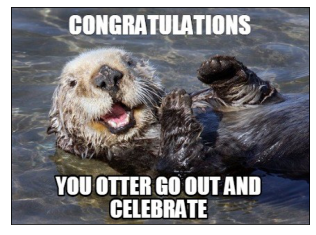

In [7]:
# Do not modify this block!
x0 = zeros((200,1))
x = fbs(f,gradf,proxg,x0, tol=1e-8) # Note: I use super high accuracy here so that my unit best below works

# Test that your solution satisfies the optimality condition for the problem
final_grad = gradf(x)
assert max(abs(final_grad[x==0])) <= mu+1e-4, "Your solution is incorrect"
assert norm(final_grad[x!=0] + mu*sign(x[x!=0]))/norm(final_grad[x!=0]) < 1e-4,  "Your solution is incorrect"
print('TEST PASSED! Wow! You are so in the zone right now!')
good_job("https://www.cs.umd.edu/~tomg/img/important_memes/otter.png")

### Ya know what...I changed my mind. I actually want you to solve this problem:
$$\arg \min \quad  \frac{1}{2}\|Ax-b\|^2$$ 
$$\text{subject to } x \ge 0.$$  
Update your "g" function accordingly.

In [8]:
g = lambda x: 0  # Do not change this line
def proxg(z,t): 
    # Your code here
    z = np.maximum(z, 0)
    return z

### Cool. Now call the solver and test results on the new problem.

ipykernel_launcher:17: RuntimeWarning: divide by zero encountered in true_divide


TEST PASSED! Wow! You are so in the zone right now!


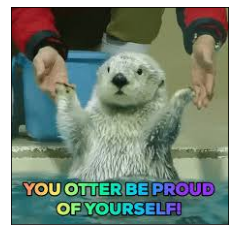

In [9]:
# Do not modify this block!
x0 = zeros((200,1))
x = fbs(f, gradf, proxg, x0, tol=1e-8) # Note: I use super high accuracy here so that my unit best below works

# Test that your solution satisfies the optimality condition for the problem
final_grad = gradf(x)
assert min(x) >= 0, "Your solution does not satisfy the constraint"
assert norm(final_grad[x>0]) < 1e-3,  "Your solution is not optimal"
assert min(final_grad[x==0]) >= 0,  "Your solution is not optimal"
print('TEST PASSED! Wow! You are so in the zone right now!')
good_job("https://www.cs.umd.edu/~tomg/img/important_memes/good_job_otter.png")

# Problem 2: Use your solver on the "Netflix" problem.
Consider a matrix $X$ of movie rankings with customers on one axis, movies on the other.  In real life our customers have only scored a small number of movies, and we want to recover the entire ranking matrix from a small sample.  If we assume the unknown matrix of movie scores is low-rank, then we can estimate it by solving 
$$\arg \min \quad  \mu\|X\|_* + \frac{1}{2}\|M\cdot X- B\|^2$$
where $M$ is a mask matrix (with a 1 for scores we observed and 0 for scores we didn't), $\| \|_*$ is the nuclear norm, and $\cdot$ denotes entry-wise multiplication.  

Let's start by cooking up a test problem.

In [10]:
# Don't modify this block!
n = 10    # How many customers?
m = 20    # How many movies?
M = randint(low=0, high=2, size=(m,n)) # A mask of 0s and 1s
X_true = randn(m,2)@randn(2,n)  # A random rank-2 matrix
B = X_true*M   # We only observe scores that are un-masked 
mu = 2         # A regularization parameter.  Ideally this should be set by cross-validation, but I'll just pick 2.

# Let's check that X_true is indeed low rank. Note that I'm using np.linalg.svd.  
# Boy, that np.linalg.svd function sure is useful. 
u, s, vh = np.linalg.svd(X_true, full_matrices=False)
print('The singular values of the rank-2 matrix are: ', s) 
print('The numerical rank of the matrix is: ', np.linalg.matrix_rank(X_true))

The singular values of the rank-2 matrix are:  [1.57010723e+01 1.14848560e+01 1.28049778e-15 7.15091379e-16
 5.70179393e-16 3.57092738e-16 2.95509262e-16 1.91422190e-16
 1.45446601e-16 5.98285047e-17]
The numerical rank of the matrix is:  2


### Now write your down the components you need to solve this problem

In [11]:
# Fill out the implementations of these methods. I suggest using lambda functions to keep it short
f = lambda X:0.5 * np.square(norm(M*X - B))# Your code here
gradf = lambda x:M*(M*x - B) # Your code here
g = lambda x: 0   # Don't change this line
def proxg(X,t):
    # Your code here
    u, s, v = np.linalg.svd(B)
    s = np.zeros((u.shape[1], v.shape[0]))
    d = np.minimum(u.shape[1], v.shape[0])
    s[0:d, 0:d] = np.diag(s)
    return u.dot(shrink(s, t).dot(v))

### A little test never hurt anyone.

ipykernel_launcher:17: RuntimeWarning: divide by zero encountered in true_divide


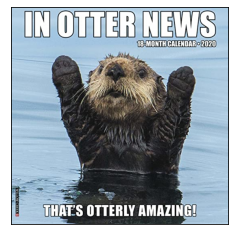

In [12]:
# Do not modify this block!
X0 = zeros((m,n))
X = fbs(f, gradf, proxg, X0, tol=1e-8) # Note: I use super high accuracy here so that my unit best below works

rank = np.linalg.matrix_rank(X, tol=1e-5)
assert rank <=3, "Your solution is not low rank"
assert norm(X - proxg(X - gradf(X),1)) < 1e-4,  "Your solution is not optimal"
good_job("https://www.cs.umd.edu/~tomg/img/important_memes/otter_news.png")